In [28]:
import torch.cuda

from fen.model.fen import FEN, GraphData
from fen.dataset import CGPDataset
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

MODEL_PATH = "../exp/size_200_3/model_19.pth"
DATASET_PATH = "../datasets/ariths_gen_sampled_100_high_prec/val"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
@dataclass
class Item:
    prediction: float
    ground_truth: float
    error: float
    input_width: int
    longest_path: int
    size: int
    

def show(axs, stats, x_attr, y_attr):
    x = [getattr(s, x_attr) for s in stats]
    y = [getattr(s, y_attr) for s in stats]
    axs.scatter(x, y)
    axs.set_title(f"{x_attr}/{y_attr}")

def evaluate(model, dataset):
    stats = []
    for i, sample in enumerate(dataset):
        print(f"Processing sample {i}/{len(dataset)}")
        g1, g2, sim = sample
        g1_data, g2_data = GraphData.from_graph(g1), GraphData.from_graph(g2)
        g1_embd = model(g1_data.to(device))
        g2_embd = model(g2_data.to(device))
        g1_output = g1_embd[g1_data.outputs]
        g2_output = g2_embd[g2_data.outputs]
        emb_sim = model.similarity(g1_output, g2_output).item() 
        error = abs(emb_sim - sim)
        longest_path = max(g1.forward_index[-1], g2.forward_index[-1])
        size = max(g1.n_nodes, g2.n_nodes)
        input_width = g1.n_inputs
        stats.append(Item(
            prediction=emb_sim,
            ground_truth=sim,
            error=error,
            input_width=input_width,
            longest_path=longest_path,
            size=size
        ))
        
    fig, axs = plt.subplots(2, 2)
    show(axs[0,0], stats, "size", "error")
    show(axs[0,1], stats, "ground_truth", "prediction")
    show(axs[1,0], stats, "input_width", "error")
    show(axs[1,1], stats, "longest_path", "error")
    
    mean = np.mean([x.error for x in stats])
    print(f"Mean {mean}")
    
    fig.tight_layout()
    plt.show()
        

Processing sample 0/200
Processing sample 1/200
Processing sample 2/200
Processing sample 3/200
Processing sample 4/200
Processing sample 5/200
Processing sample 6/200
Processing sample 7/200
Processing sample 8/200
Processing sample 9/200
Processing sample 10/200
Processing sample 11/200
Processing sample 12/200
Processing sample 13/200
Processing sample 14/200
Processing sample 15/200
Processing sample 16/200
Processing sample 17/200
Processing sample 18/200
Processing sample 19/200
Processing sample 20/200
Processing sample 21/200
Processing sample 22/200
Processing sample 23/200
Processing sample 24/200
Processing sample 25/200
Processing sample 26/200
Processing sample 27/200
Processing sample 28/200
Processing sample 29/200
Processing sample 30/200
Processing sample 31/200
Processing sample 32/200
Processing sample 33/200
Processing sample 34/200
Processing sample 35/200
Processing sample 36/200
Processing sample 37/200
Processing sample 38/200
Processing sample 39/200
Processing

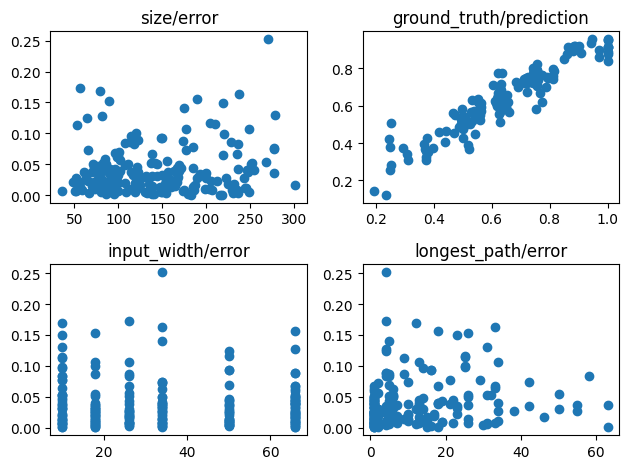

In [30]:
model = FEN()
model.load(MODEL_PATH)
model.to(device)

dataset = CGPDataset(DATASET_PATH, return_graphs=True)
evaluate(model, dataset)